# Manifold Learning - Handwritten Digits

## Example code is using the following template
http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

## Authors:
Fabian Pedregosa <fabian.pedregosa@inria.fr>

Olivier Grisel <olivier.grisel@ensta.org>

Mathieu Blondel <mathieu@mblondel.org>

Gael Varoquaux
## License: BSD 3 clause (C) INRIA 2011

Automatically created module for IPython interactive environment
Computing sparse random projection
Computing Gaussian random projection
Computing PCA projection
Computing Linear Discriminant Analysis projection
Computing Isomap embedding
Done.
Computing LLE embedding
Done. Reconstruction error: 1.63544e-06
Computing modified LLE embedding
Done. Reconstruction error: 0.360659
Computing Hessian LLE embedding
Done. Reconstruction error: 0.212802
Computing LTSA embedding
Done. Reconstruction error: 0.212805
Computing MDS embedding
Done. Stress: 142527135.151874
Computing Totally Random Trees embedding
Computing Spectral embedding
Computing t-SNE embedding


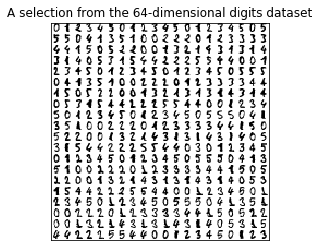

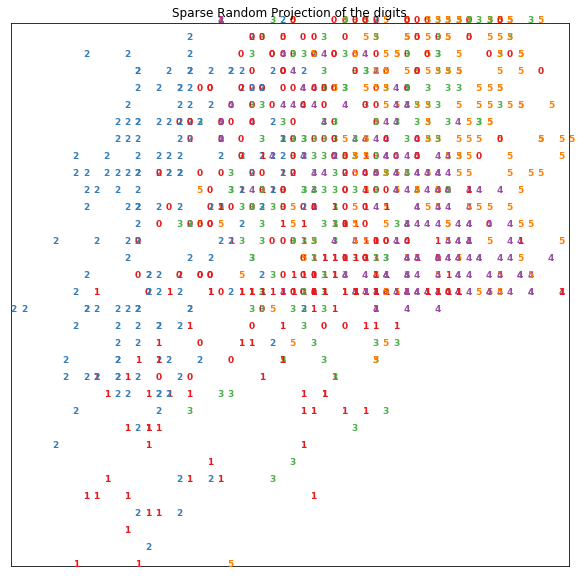

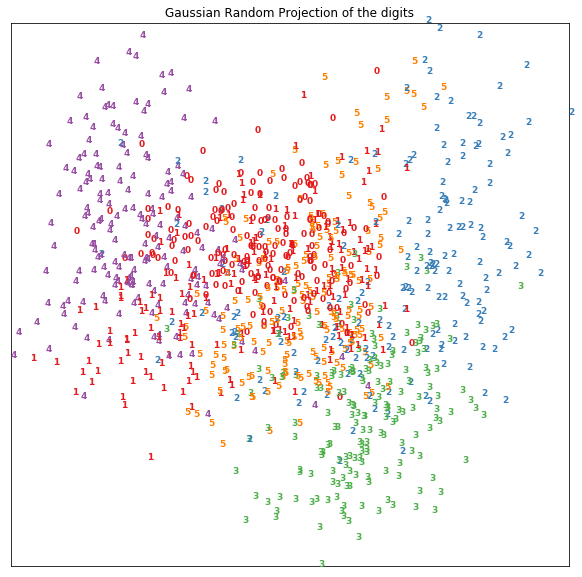

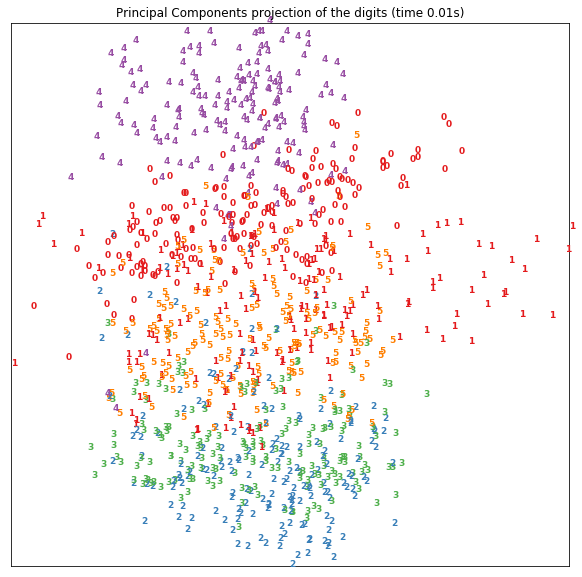

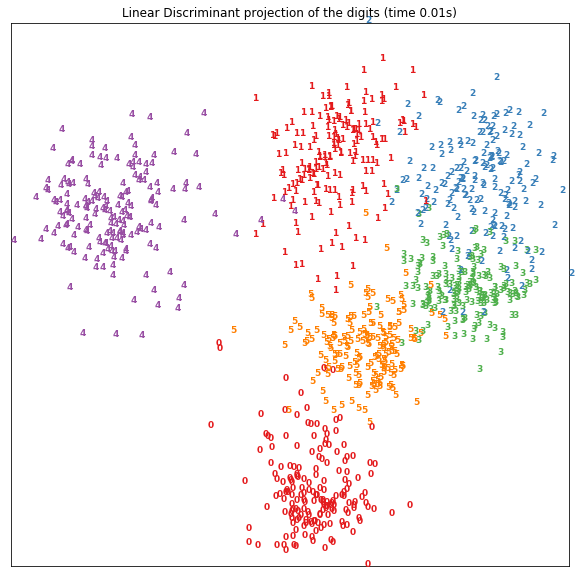

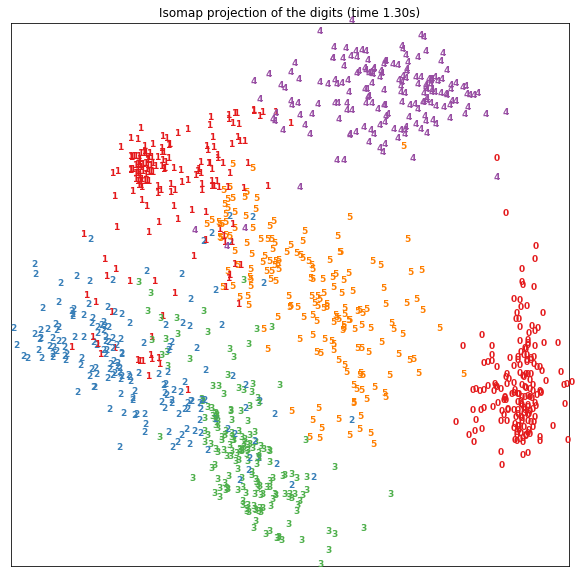

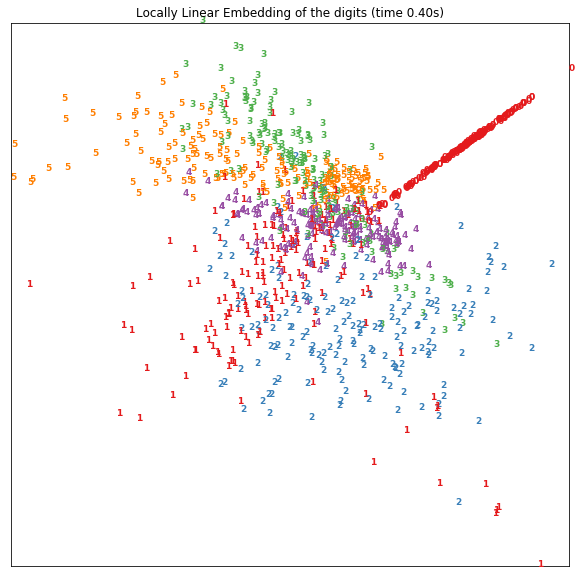

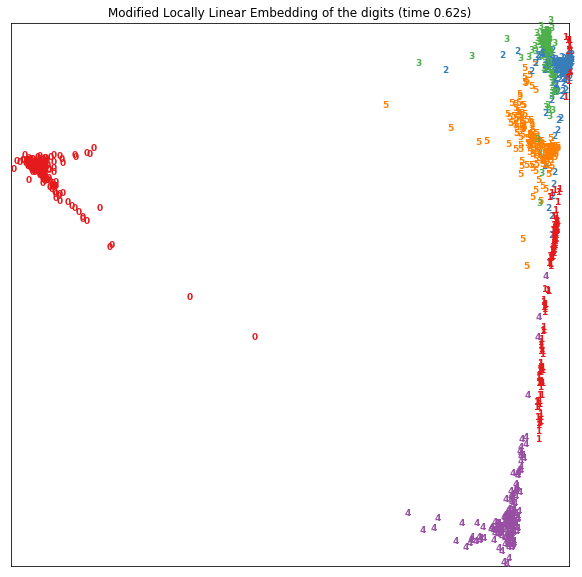

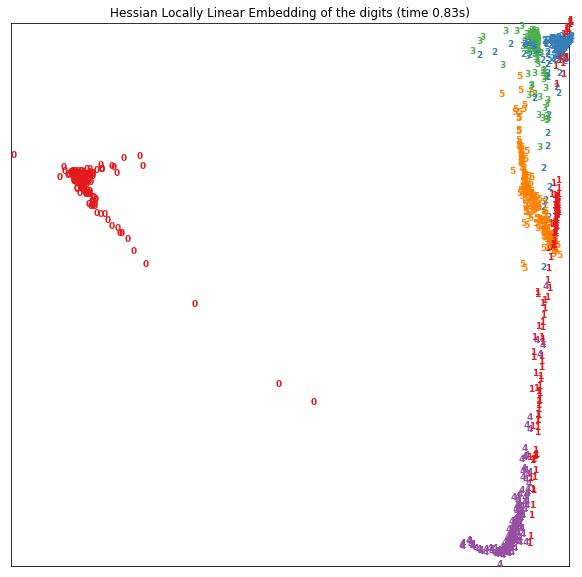

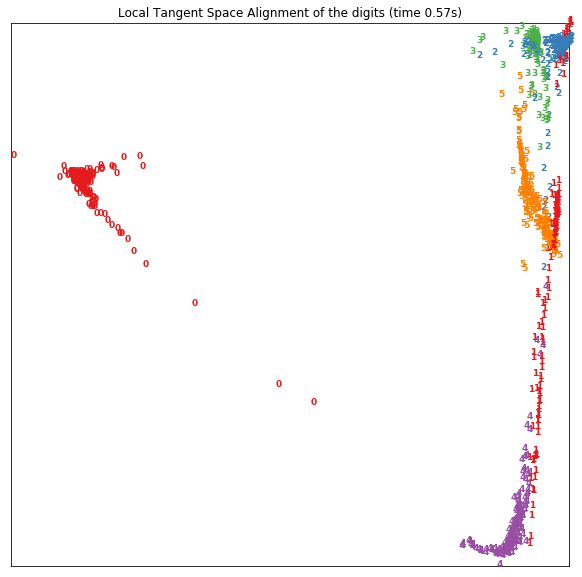

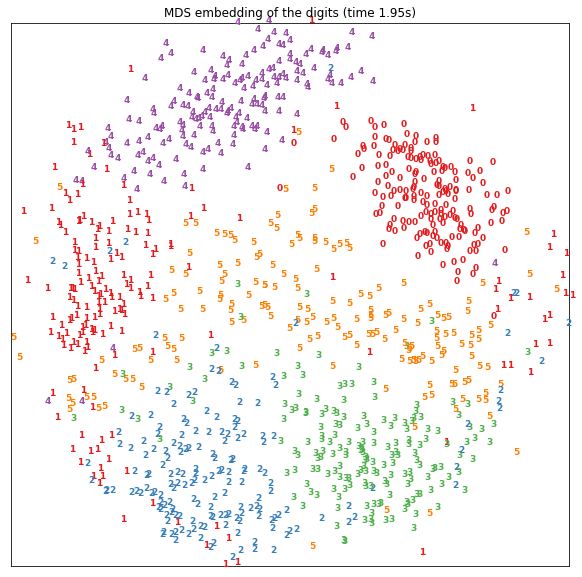

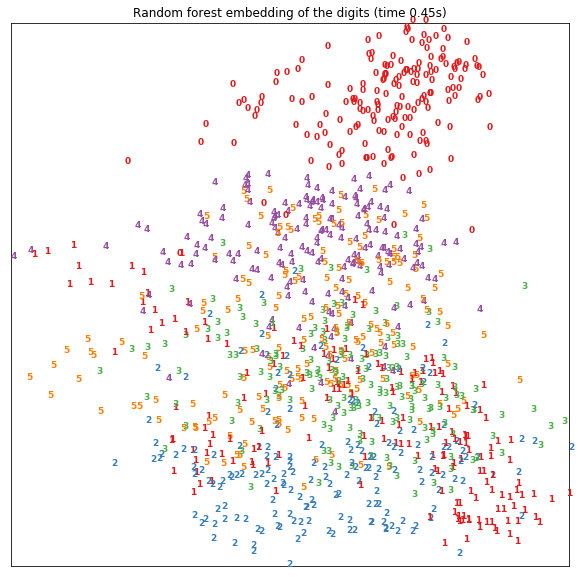

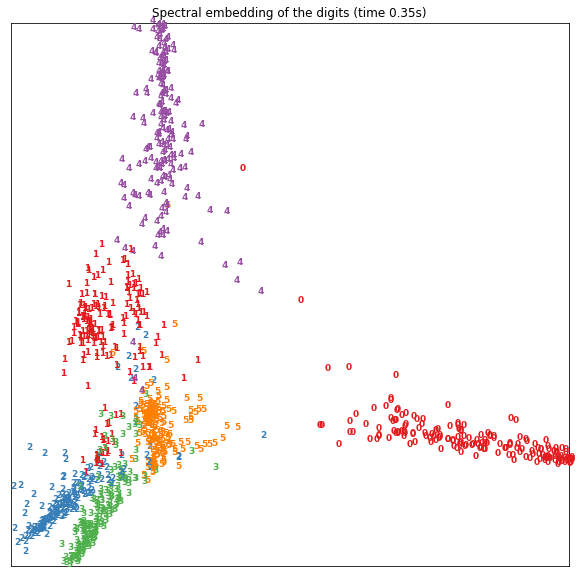

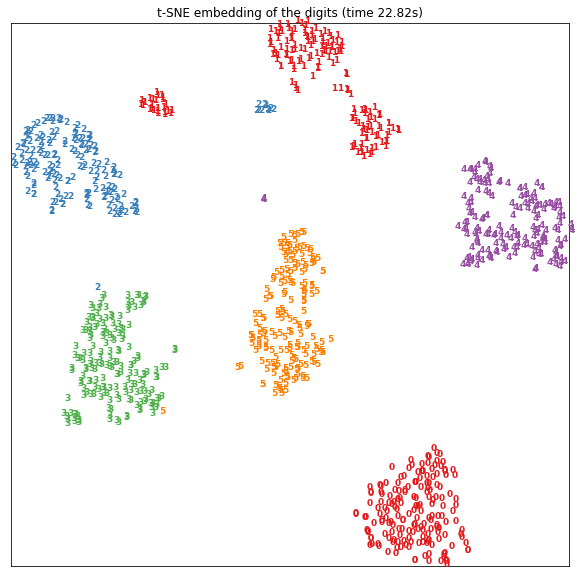

In [49]:
# Adjustments by S.Kuehn, stefan.kuehn@xing.com

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
%matplotlib inline
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None,subplot=111):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(subplot)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

#    if hasattr(offsetbox, 'AnnotationBbox'):
#        # only print thumbnails with matplotlib > 1.0
#        shown_images = np.array([[1., 1.]])  # just something big
#        for i in range(digits.data.shape[0]):
#            dist = np.sum((X[i] - shown_images) ** 2, 1)
#            if np.min(dist) < 4e-3:
#                # don't show points that are too close
#               continue
#            shown_images = np.r_[shown_images, [X[i]]]
#            imagebox = offsetbox.AnnotationBbox(
#                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                X[i])
#            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


#----------------------------------------------------------------------
# Sparse Random 2D projection using a random unitary matrix
print("Computing sparse random projection")
rp = random_projection.SparseRandomProjection(n_components=3, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Sparse Random Projection of the digits")


#----------------------------------------------------------------------
# Gaussian Random 2D projection using a random unitary matrix
print("Computing Gaussian random projection")
rp = random_projection.GaussianRandomProjection(n_components=3, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Gaussian Random Projection of the digits")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# HLLE embedding of the digits dataset
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

## Check singular values as criterion for dimensionality of the data

In [93]:
from sklearn.decomposition import TruncatedSVD
t0 = time()
svd = TruncatedSVD(n_components=63, n_iter=7, random_state=42)
svd.fit(X)  
print(np.cumsum(svd.explained_variance_ratio_))  
#print(svd.explained_variance_ratio_.sum())  
print(svd.singular_values_)
t1 = time()

[0.02632557 0.2189581  0.38324694 0.49820778 0.58337399 0.63585882
 0.68199925 0.71783462 0.74652876 0.77244987 0.79468799 0.81494471
 0.83284631 0.84780871 0.86085431 0.87227158 0.88293103 0.89258262
 0.90187187 0.90991751 0.91776493 0.92465064 0.93087341 0.93644121
 0.94171388 0.94670299 0.95136407 0.95581217 0.9597636  0.96345522
 0.96685965 0.970003   0.97304134 0.97594633 0.97860184 0.98115858
 0.98342094 0.98547931 0.98744857 0.98923389 0.99083174 0.99242335
 0.99381542 0.99507085 0.99620499 0.99724207 0.99823192 0.99890483
 0.99928779 0.99958896 0.99975484 0.999863   0.99991709 0.99996613
 0.99998571 0.99999117 0.99999539 0.99999738 0.99999865 0.99999948
 1.         1.         1.        ]
[1.69812088e+03 5.03692773e+02 4.65214368e+02 3.89108978e+02
 3.34915209e+02 2.62916901e+02 2.46533588e+02 2.17247746e+02
 1.94401238e+02 1.84809192e+02 1.71138081e+02 1.63336329e+02
 1.53561296e+02 1.40381666e+02 1.31090170e+02 1.22624651e+02
 1.18489531e+02 1.12744592e+02 1.10611960e+02 1.029

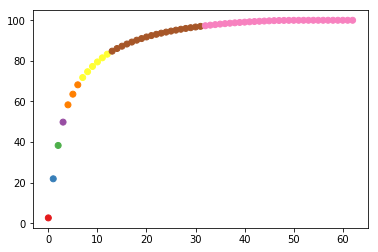

In [94]:
#plt.scatter(range(0,63),svd.singular_values_[0:63])
plt.scatter(range(0,63),100*np.cumsum(svd.explained_variance_ratio_),color=plt.cm.Set1(0.8*np.cumsum(svd.explained_variance_ratio_)))


## The first 40 singular values cover 99% of the variance

Computing random projection as preprocessing + other methods
(1083, 40)
0.002576112747192383
2.1720950603485107


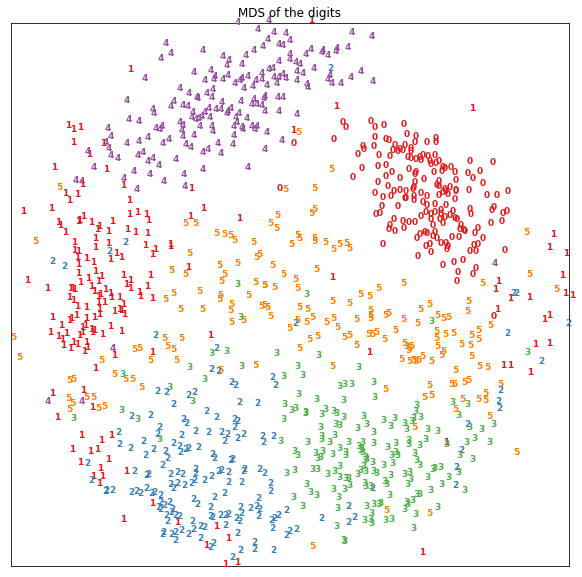

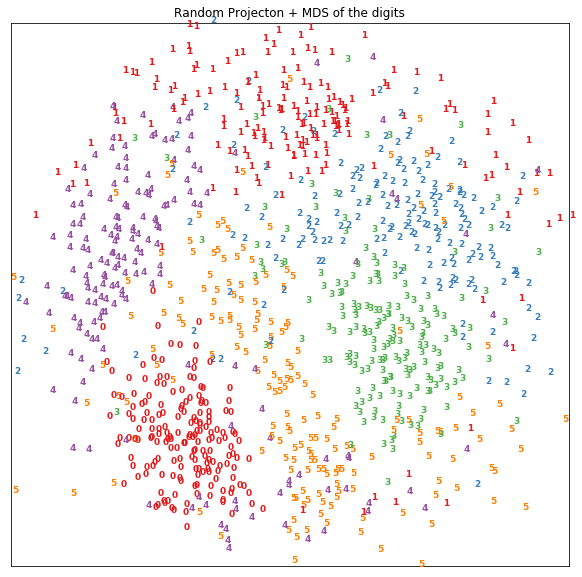

In [50]:
# Random 2D projection using a random unitary matrix
#print("Computing sparse random projection")
#rp_2sparse = random_projection.SparseRandomProjection(n_components=2, random_state=42)
#X_projected_sparse = rp_2sparse.fit_transform(X)
#print("Computing gaussian random projection")
#rp_2gauss = random_projection.GaussianRandomProjection(n_components=2, random_state=42)
#X_projected_gauss = rp_2gauss.fit_transform(X)

#----------------------------------------------------------------------
# First: Use Random 2D projection using a random unitary matrix to project to 8-dim (check decay of singular values)
# Second: Apply whatever you want
print("Computing random projection as preprocessing + other methods")
#rp_pre = random_projection.SparseRandomProjection(n_components=16, random_state=0)
rp_pre = random_projection.GaussianRandomProjection(n_components=40, random_state=0)
t0 = time()
X_projected_pre = rp_pre.fit_transform(X)
print(X_projected_pre.shape)
print(time()-t0)
#X_projected_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X_projected_pre, y)
t0 = time()
X_projected_mds = clf.fit_transform(X_projected_pre)
print(time()-t0)
#X_projected_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X_projected_pre)
#tsne2 = manifold.TSNE(n_components=2, init='random', random_state=0)
#tsne2 = manifold.TSNE(n_components=2, init='pca', random_state=0)
#t0 = time()
#X_projected_tsne = tsne2.fit_transform(X_projected_pre)
#print(time()-t0)
#----------------------------------------------------------------------
# Plot everything
#plot_embedding(X_projected_sparse, "Sparse Random Projection of the digits")
#plot_embedding(X_projected_gauss, "Gaussian Random Projection of the digits")
#plot_embedding(X_lda, "LDA of the digits")
#plot_embedding(X_projected_lda, "Random Projection + LDA of the digits")
plot_embedding(X_mds, "MDS of the digits")
plot_embedding(X_projected_mds, "Random Projecton + MDS of the digits")
#plot_embedding(X_pca, "Principal Components projection of the digits")
#plot_embedding(X_projected_pca, "Random Projection + Principal Components projection of the digits")
#plot_embedding(X_tsne,"t-SNE embedding of the digits")
#plot_embedding(X_projected_tsne,"Random Projection + t-SNE embedding of the digits")


Computing PCA projection as preprocessing + other methods
(1083, 6)
0.004661083221435547
21.701339960098267


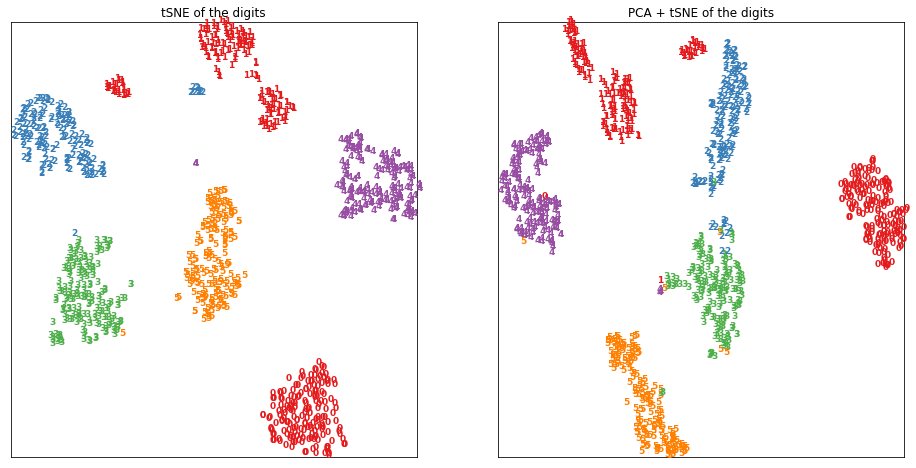

In [132]:
#----------------------------------------------------------------------
# First: Use PCA to project to low-dim space (check decay of singular values)
# Second: Apply whatever you want
print("Computing PCA projection as preprocessing + other methods")
pca_pre = decomposition.TruncatedSVD(n_components=6)
t0 = time()
X_projected_pre = pca_pre.fit_transform(X)
print(X_projected_pre.shape)
print(time()-t0)
#X_projected_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X_projected_pre, y)
# MDS  embedding of the digits dataset
#print("Computing MDS embedding")
#mds = manifold.MDS(n_components=2, n_init=1, max_iter=1000)
#t0 = time()
#X_mds = mds.fit_transform(X)
#print(time()-t0)
#print("Done. Stress: %f" % mds.stress_)
#mds = manifold.MDS(n_components=2, n_init=1, max_iter=4000)
#t0 = time()
#X_projected_mds = mds.fit_transform(X_projected_pre)
#print(time()-t0)
#X_projected_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X_projected_pre)
tsne2 = manifold.TSNE(n_components=2, init='random', random_state=0)
#tsne2 = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_projected_tsne = tsne2.fit_transform(X_projected_pre)
print(time()-t0)
#t0 = time()
#X_tsne = tsne2.fit_transform(X)
#print(time()-t0)
#----------------------------------------------------------------------
# Plot everything
#plot_embedding(X_projected_sparse, "Sparse Random Projection of the digits")
#plot_embedding(X_projected_gauss, "Gaussian Random Projection of the digits")
#plot_embedding(X_lda, "LDA of the digits")
#plot_embedding(X_projected_lda, "Random Projection + LDA of the digits")
#plot_embedding(X_mds, "MDS of the digits")
#plot_embedding(X_projected_mds, "PCA + MDS of the digits")
#plot_embedding(X_pca, "Principal Components projection of the digits")
#plot_embedding(X_projected_pca, "Random Projection + Principal Components projection of the digits")
#plot_embedding(X_tsne,"t-SNE embedding of the digits")
#plot_embedding(X_projected_tsne,"PCA Projection + t-SNE embedding of the digits")
fig = plt.figure(figsize=(16, 8))
#plot_embedding_variant(X_mds, "MDS of the digits",subplot=121)
#plot_embedding_variant(X_projected_mds, "PCA + MDS of the digits",subplot=122)
plot_embedding_variant(X_tsne, "tSNE of the digits",subplot=121)
plot_embedding_variant(X_projected_tsne, "PCA + tSNE of the digits",subplot=122)


In [99]:
# Generate subplots in given plot
# Scale and visualize the embedding vectors
def plot_embedding_variant(X, title=None,subplot=111):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    ax = plt.subplot(subplot)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

#    if hasattr(offsetbox, 'AnnotationBbox'):
#        # only print thumbnails with matplotlib > 1.0
#        shown_images = np.array([[1., 1.]])  # just something big
#        for i in range(digits.data.shape[0]):
#            dist = np.sum((X[i] - shown_images) ** 2, 1)
#            if np.min(dist) < 4e-3:
#                # don't show points that are too close
#               continue
#            shown_images = np.r_[shown_images, [X[i]]]
#            imagebox = offsetbox.AnnotationBbox(
#                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                X[i])
#            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


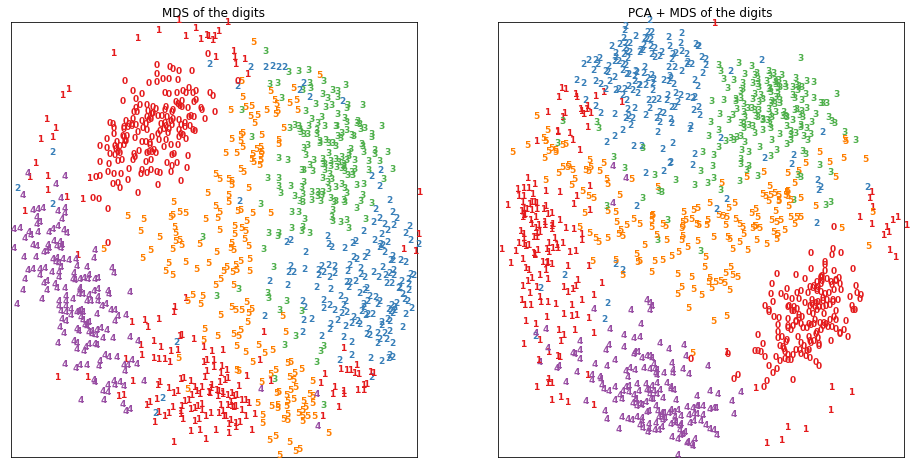

In [130]:
fig = plt.figure(figsize=(16, 8))
plot_embedding_variant(X_mds, "MDS of the digits",subplot=121)
plot_embedding_variant(X_projected_mds, "PCA + MDS of the digits",subplot=122)

Computing MDS embedding
Done. Stress: 60268962.088449
Computing t-SNE embedding


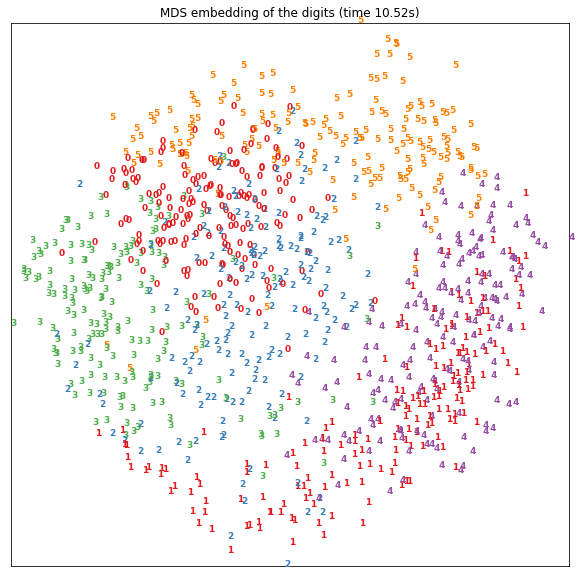

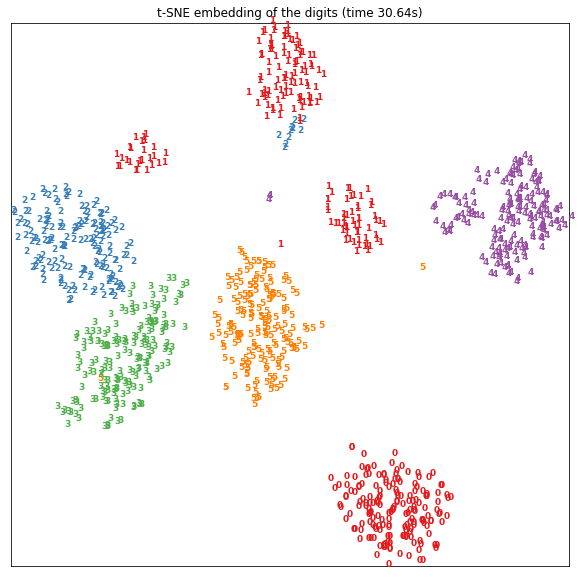

In [48]:
#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=3, n_init=1, max_iter=5000, random_state=0)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

In [14]:
X_mds.shape

(1083, 3)

In [45]:
X_tsne.shape

(1083, 3)

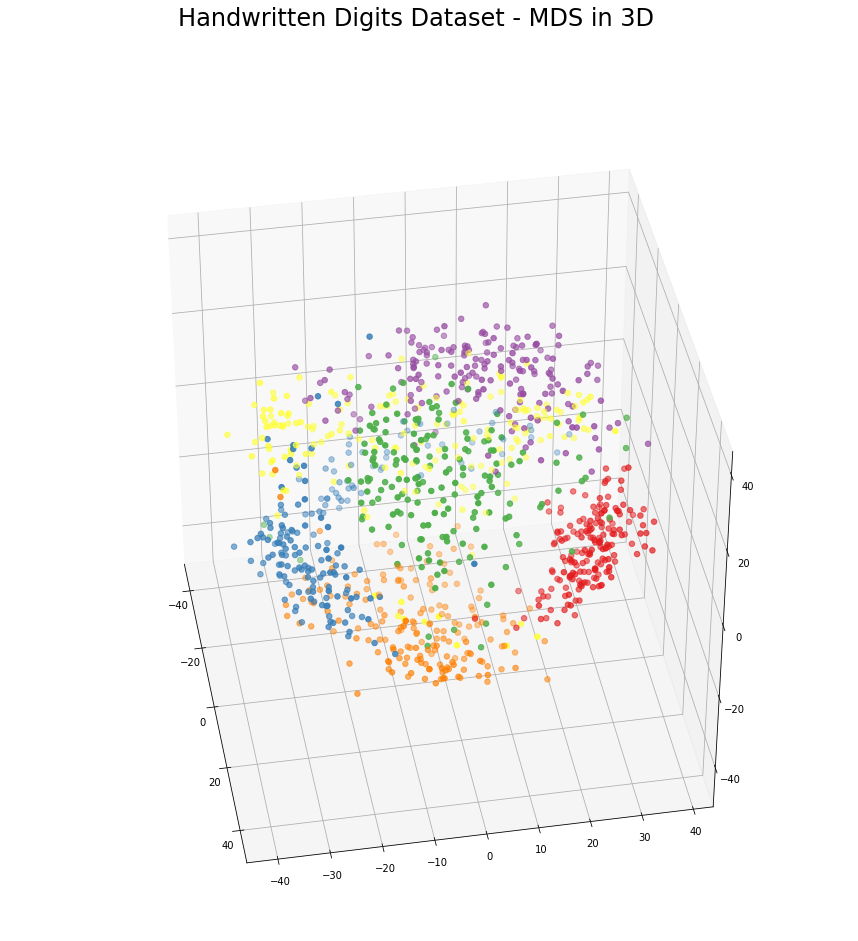

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
Axes3D
# Plot our dataset.
fig = plt.figure(figsize=(15, 15))
plt.suptitle("Handwritten Digits Dataset - MDS in 3D", fontsize=24)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_mds[:,0] ,X_mds[:,1] ,X_mds[:,2], c=plt.cm.Set1(y)/1. , s= 30)
ax.view_init(40, -10)

#plot_embedding_3D(X_mds)
#plt.show()

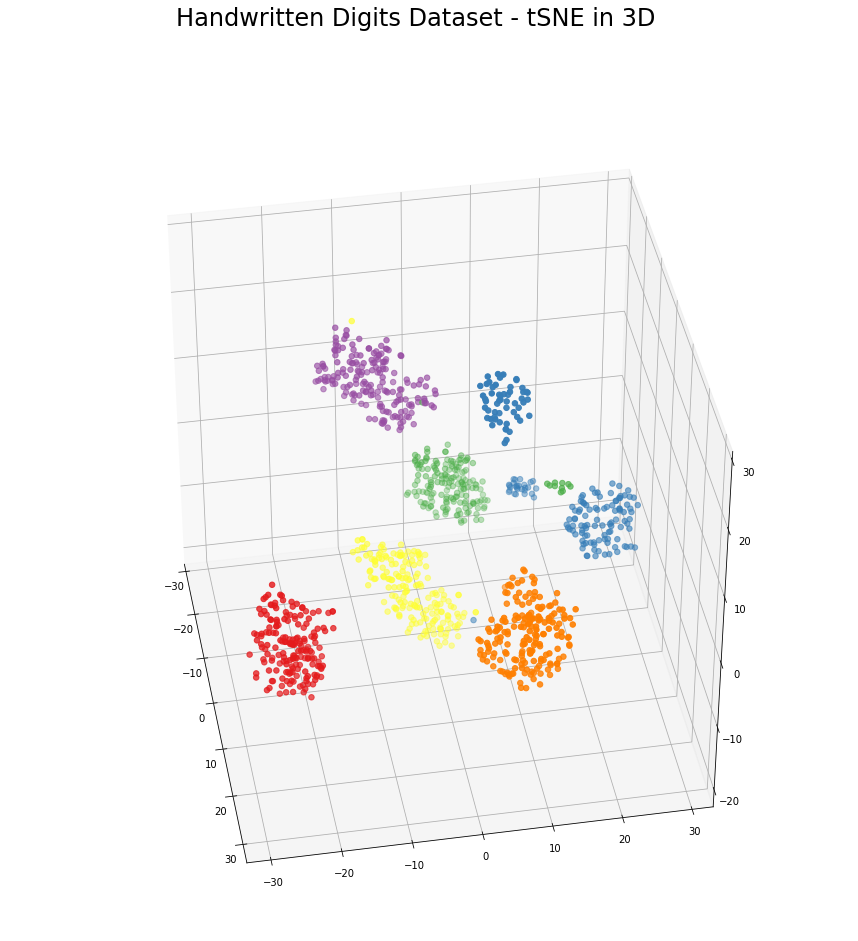

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
Axes3D
# Plot our dataset.
fig = plt.figure(figsize=(15, 15))
plt.suptitle("Handwritten Digits Dataset - tSNE in 3D", fontsize=24)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:,0] ,X_tsne[:,1] ,X_tsne[:,2], c=plt.cm.Set1(y)/1. , s= 30)
ax.view_init(40, -10)

#plot_embedding_3D(X_mds)
#plt.show()